<a href="https://colab.research.google.com/github/alexandrufalk/tensorflow/blob/Master/01_Neural_Network_Regression_tensorflow_exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# File path
file_path='/content/drive/My Drive/Colab Notebooks/car_price_prediction.csv'

#Read cvs
df=pd.read_csv(file_path)

df.head()


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [9]:
# One hot encoding of dataset
df_one_hot=pd.get_dummies(df)
df_one_hot.head()

,ID,Price,Prod. year,Cylinders,Airbags,Levy_-,Levy_1011,Levy_1016,Levy_1017,Levy_1018,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,45654403,13328,2010,6.0,12,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44731507,16621,2011,6.0,8,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,45774419,8467,2006,4.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45769185,3607,2011,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,45809263,11726,2014,4.0,4,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [6]:
# Create X and y
X=df_one_hot.drop("Price",axis=1)
y=df_one_hot["Price"]
X.head(),y.head()

(         ID  Prod. year  Cylinders  Airbags  Levy_-  Levy_1011  Levy_1016  \
 0  45654403        2010        6.0       12       0          0          0   
 1  44731507        2011        6.0        8       0          0          0   
 2  45774419        2006        4.0        2       1          0          0   
 3  45769185        2011        4.0        0       0          0          0   
 4  45809263        2014        4.0        4       0          0          0   
 
    Levy_1017  Levy_1018  Levy_1024  ...  Color_Green  Color_Grey  \
 0          0          0          0  ...            0           0   
 1          0          1          0  ...            0           0   
 2          0          0          0  ...            0           0   
 3          0          0          0  ...            0           0   
 4          0          0          0  ...            0           0   
 
    Color_Orange  Color_Pink  Color_Purple  Color_Red  Color_Silver  \
 0             0           0             0 

In [7]:
# Create training and test sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
len(X_test), len(y_test), len(X_train), len(y_train)

(3848, 3848, 15389, 15389)

In [8]:
# Creating the model

# Set random seed
tf.random.set_seed(42)

#1 Create the model
car_price_model1=tf.keras.Sequential([tf.keras.layers.Dense(10),
                                      tf.keras.layers.Dense(1)])

#2 Compile
car_price_model1.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                         metrics=["mae"])
#3 Fit

history1=car_price_model1.fit(X_train, y_train, epochs=100, verbose=0)

In [9]:
# Check the results of the model
car_price_model1.evaluate(X_test,y_test)

121/121 [==============================] - 3s 20ms/step - loss: 12018.1279 - mae: 12018.1279


[12018.1279296875, 12018.1279296875]

Text(0.5, 0, 'epochs')

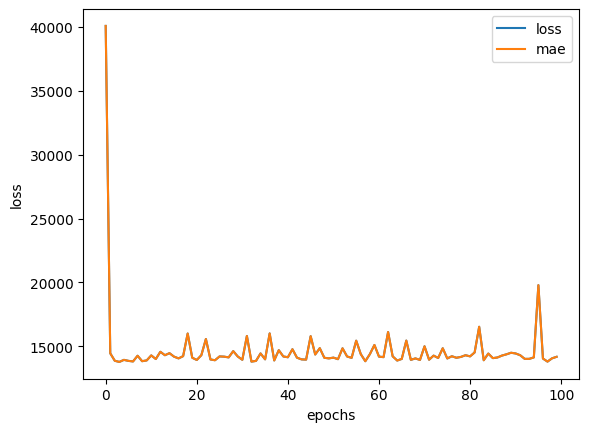

In [12]:
# Plot history - loss curve
pd.DataFrame(history1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [13]:
import numpy as np
X_pred=X_test.iloc[3]
X_pred


ID                45732345.0
Prod. year            2014.0
Cylinders                4.0
Airbags                  4.0
Levy_-                   0.0
                     ...    
Color_Red                0.0
Color_Silver             0.0
Color_Sky blue           0.0
Color_White              0.0
Color_Yellow             0.0
Name: 1957, Length: 10060, dtype: float64

In [15]:
# Reshape X_pred to have the same number of features as your training data
X_pred_reshaped = np.array(X_pred).reshape(1, 10060)

X_pred_reshaped

array([[4.5732345e+07, 2.0140000e+03, 4.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [16]:
# Make prediction
y_pred = car_price_model1.predict(X_pred_reshaped)

1/1 [==============================] - 1s 852ms/step


In [17]:
y_pred

array([[8927.76]], dtype=float32)

In [18]:
#y to predict
y_to_pred=y_test.iloc[3]
y_to_pred

38737

In [19]:
#dif
dif=y_pred-y_to_pred
dif

array([[-29809.24]], dtype=float32)

# Create new X and y from reduced df

In [5]:
df=pd.read_csv(file_path)

df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [15]:
df_red=df.drop(['Levy', 'Color',"Doors", "Wheel","Category"],axis=1)
df_red['Mileage'] = df_red['Mileage'].str.replace(r'\D', '', regex=True).astype(int)
df_red['Engine volume'] = df_red['Engine volume'].str.replace(r'\D', '', regex=True).astype(int)
df_red.head()

,ID,Price,Manufacturer,Model,Prod. year,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Airbags
0,45654403,13328,LEXUS,RX 450,2010,Yes,Hybrid,35,186005,6.0,Automatic,4x4,12
1,44731507,16621,CHEVROLET,Equinox,2011,No,Petrol,3,192000,6.0,Tiptronic,4x4,8
2,45774419,8467,HONDA,FIT,2006,No,Petrol,13,200000,4.0,Variator,Front,2
3,45769185,3607,FORD,Escape,2011,Yes,Hybrid,25,168966,4.0,Automatic,4x4,0
4,45809263,11726,HONDA,FIT,2014,Yes,Petrol,13,91901,4.0,Automatic,Front,4


In [16]:
# One hot encoding of dataset
df_one_hot2=pd.get_dummies(df_red)
df_one_hot2.head()

,ID,Price,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,Manufacturer_ASTON MARTIN,...,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear
0,45654403,13328,2010,35,186005,6.0,12,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,44731507,16621,2011,3,192000,6.0,8,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2,45774419,8467,2006,13,200000,4.0,2,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,45769185,3607,2011,25,168966,4.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,45809263,11726,2014,13,91901,4.0,4,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [19]:
# Create X and y
X2=df_one_hot2.drop("Price",axis=1)
y2=df_one_hot2["Price"]
X2.head(),y2.head()

(         ID  Prod. year  Engine volume  Mileage  Cylinders  Airbags  \
 0  45654403        2010             35   186005        6.0       12   
 1  44731507        2011              3   192000        6.0        8   
 2  45774419        2006             13   200000        4.0        2   
 3  45769185        2011             25   168966        4.0        0   
 4  45809263        2014             13    91901        4.0        4   
 
    Manufacturer_ACURA  Manufacturer_ALFA ROMEO  Manufacturer_ASTON MARTIN  \
 0                   0                        0                          0   
 1                   0                        0                          0   
 2                   0                        0                          0   
 3                   0                        0                          0   
 4                   0                        0                          0   
 
    Manufacturer_AUDI  ...  Fuel type_LPG  Fuel type_Petrol  \
 0                  0  ...       

In [20]:
# Create training and test sets

from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,test_size=0.2, random_state=42)
len(X_test2), len(y_test2), len(X_train2), len(y_train2)

(3848, 3848, 15389, 15389)

In [21]:
# Creating the 2nd model

# Set random seed
tf.random.set_seed(42)

# Define EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=15,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore weights to the best value observed during training
)

#1 Create the model
car_price_model2=tf.keras.Sequential([tf.keras.layers.Dense(100),
                                      tf.keras.layers.Dense(10),
                                      tf.keras.layers.Dense(1)])

#2 Compile
car_price_model2.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                         metrics=["mae"])
#3 Fit

history2=car_price_model2.fit(X_train2,
    y_train2,
    epochs=200,
    verbose=0,
    validation_split=0.2,  # Specify validation data
    callbacks=[early_stopping]  # Pass EarlyStopping callback
)

In [23]:
# Evaluate the model
loss2, mae2 =car_price_model2.evaluate(X_test2,y_test2)
print("Test Loss:", loss2)
print("Test MAE:", mae2)

121/121 [==============================] - 1s 4ms/step - loss: 11696.2090 - mae: 11696.2090
Test Loss: 11696.208984375
Test MAE: 11696.208984375


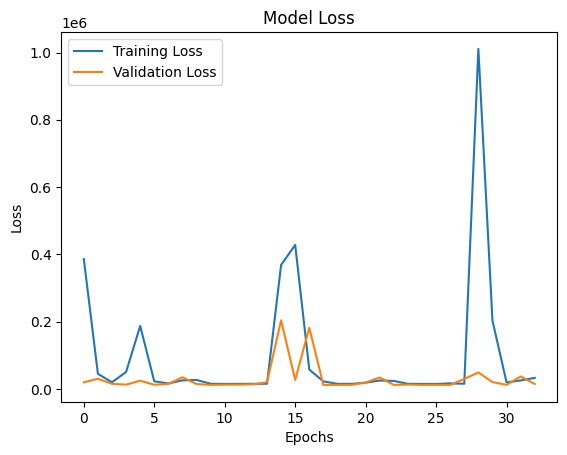

In [24]:
# Plot history - loss curve
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
import numpy as np
X_pred2=X_test2.iloc[3]
X_pred2

ID                         45732345.0
Prod. year                     2014.0
Engine volume                     2.0
Mileage                      132756.0
Cylinders                         4.0
                              ...    
Gear box type_Tiptronic           0.0
Gear box type_Variator            0.0
Drive wheels_4x4                  0.0
Drive wheels_Front                1.0
Drive wheels_Rear                 0.0
Name: 1957, Length: 1677, dtype: float64

In [29]:
# Reshape X_pred to have the same number of features as your training data
X_pred_reshaped2 = np.array(X_pred2).reshape(1, 1677)

X_pred_reshaped2

array([[4.5732345e+07, 2.0140000e+03, 2.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]])

In [32]:
# Make prediction
y_pred2 = car_price_model2.predict(X_pred_reshaped2)


1/1 [==============================] - 1s 926ms/step


In [33]:
y_pred2

array([[10413.651]], dtype=float32)

In [34]:
#y to predict
y_to_pred2=y_test2.iloc[3]
y_to_pred2

38737

In [35]:
#dif
dif2=y_pred2-y_to_pred2
dif2

array([[-28323.348]], dtype=float32)